In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

METADATA = {'Contributor': 'T. Dunn'}
FSIZE = [5,4]
FDPI = 100
SAVEFIGS = False

df0 = pd.read_csv('saving-throws.csv')
df0 = df0.astype({'Book': 'category', 'Type': 'category', 'Size': 'category'})
df0['Ave Mod'] = (df0['Str Mod'] + df0['Dex Mod'] + df0['Con Mod'] + df0['Int Mod'] + df0['Wis Mod'] + df0['Cha Mod'])/6
print('Includes {} monsters in database'.format(len(df0.index.to_list())))

dfD = pd.read_csv('../../assets/data/dmg-targets.csv') # 'CR','PB','AC','AB'

Includes 1920 monsters in database


In [4]:
# Setup template and html config for plotly figures.
import plotly.graph_objects as go

TFB_TEMPLATE = dict(
    layout=go.Layout(
        template='plotly_white',
        autosize=True, # must be True to auto-scale when resizing
        margin=dict(l=50, r=25, b=40, t=20, pad=4),
        font=dict(
            family='sans-serif',
            size=14
        ),
        hovermode='closest',
        xaxis=dict(
            autorange=False,
            automargin=True,
            fixedrange=True,
            showline=True,
            linecolor='#444',
            linewidth=2,
            mirror=True,
            tickmode='linear',
            ticks='outside',
            minor=dict(
                #showgrid=True,
                tickmode='linear',
                ticks='outside',
            ),
            zeroline=False,
        ),
        yaxis=dict(
            autorange=False,
            automargin=True,
            fixedrange=True,
            showline=True,
            linecolor='#444',
            linewidth=2,
            mirror=True,
            tickmode='linear',
            ticks='outside',
            minor=dict(
                #showgrid=True,
                tickmode='linear',
                ticks='outside',
            ),
            zeroline=False,
        ),
        #legend=dict(font_size=10),
    )
)

TFB_CONFIG = {
    'responsive': True, # must be True to auto-scale when resizing
    'autosizable': True, # doesn't impact auto rescaling
    'showAxisDragHandles': False,
    'displaylogo': False,
    'displayModeBar': 'hover',
    'modeBarButtonsToRemove': [
        'select2d',
        'lasso2d',
        'zoom2d',
        'zoomIn2d',
        'zoomOut2d',
        'pan2d',
        'autoScale2d',
        'hoverClosestCartesian',
        'hoverCompareCartesian',
        'toggleSpikelines',
        'resetScale2d',
    ],
    'toImageButtonOptions': {
        'format': 'png', # one of png, svg, jpeg, webp
        'filename': 'tfb-plot',
        'height': 450,
        'width': 600,
        'scale': 2
    },
}


In [9]:
# Ability score modifier
columns = ['Str Save','Dex Save','Con Save','Int Save','Wis Save','Cha Save']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

#df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1/8, 30)]
df1 = df0[df0['CR'].between(1/8, 30)]
dfG = df1.groupby('CR').mean().reset_index()

fig = go.Figure()

for column, color in zip(columns, colors):
    # generate custom text
    cr_totals = df1.groupby('CR').count()['Book'].to_list()

    # plot data
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=dfG[column],
        mode='markers', 
        marker=dict(size=4, color=color),
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=True,
        name=column,
        legendgroup=column,
        hovertemplate=
            '<b>CR:</b> %{x}<br>'+
            '<b>Ability:</b> ' + column[0:3] + '<br>'+
            '<b>Bonus:</b> %{y:.1f}'+
            '<extra></extra>'
    ))

    # add fit line
    coefs = np.polyfit(dfG['CR'], dfG[column], 1)
    poly = np.poly1d(coefs)
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=poly(dfG['CR']),
        mode='lines', 
        line=dict(color=color, dash='solid'),
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=False,
        legendgroup=column,
        legendgrouptitle_text='fit',
        hoverinfo='skip',
    ))

# save large format figure
fig.update_layout(
    template=TFB_TEMPLATE,
    xaxis=dict(
        title_text='challenge rating',
        range=[0.0, 30.2],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    yaxis=dict(
        title_text='save bonus',
        range=[-3, 15],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    legend=dict(
        xanchor='left', yanchor='top',
        x=0.01, y=0.99,
        orientation='v',
        tracegroupgap=0,
    )
)

fig.show(config=TFB_CONFIG)

In [10]:
# Ability score modifier
columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

#df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1/8, 30)]
df1 = df0[df0['CR'].between(1/8, 30)]
dfG = df1.groupby('CR').mean().reset_index()

fig = go.Figure()

for column, color in zip(columns, colors):
    # generate custom text
    cr_totals = df1.groupby('CR').count()['Book'].to_list()

    # plot data
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=dfG[column],
        mode='markers', 
        marker=dict(size=4, color=color),
        line_shape='spline',
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=True,
        name=column,
        legendgroup=column,
        hovertemplate=
            '<b>CR:</b> %{x}<br>'+
            '<b>Ability:</b> ' + column[0:3] + '<br>'+
            '<b>Modifier:</b> %{y:.1f}'+
            '<extra></extra>'
    ))

    # add fit line
    coefs = np.polyfit(dfG['CR'], dfG[column], 1)
    poly = np.poly1d(coefs)
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=poly(dfG['CR']),
        mode='lines', 
        line=dict(color=color, dash='solid'),
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=False,
        legendgroup=column,
        legendgrouptitle_text='fit',
        hoverinfo='skip',
    ))

# save large format figure
fig.update_layout(
    template=TFB_TEMPLATE,
    xaxis=dict(
        title_text='challenge rating',
        range=[0.0, 30.2],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    yaxis=dict(
        title_text='ability modifier',
        range=[-3, 10],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    legend=dict(
        xanchor='left', yanchor='top',
        x=0.01, y=0.99,
        orientation='v',
        tracegroupgap=0,
    )
)

fig.show(config=TFB_CONFIG)

In [11]:
# Ability score modifier
columns = ['Str','Dex','Con','Int','Wis','Cha']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

#df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1/8, 30)]
df1 = df0[df0['CR'].between(1/8, 30)]
dfG = df1.groupby('CR').mean().reset_index()

fig = go.Figure()

for column, color in zip(columns, colors):
    # generate custom text
    cr_totals = df1.groupby('CR').count()['Book'].to_list()

    # plot data
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=dfG[f'{column} Save'] - dfG[f'{column} Mod'],
        mode='markers', 
        marker=dict(size=4, color=color),
        line_shape='spline',
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=True,
        name=column,
        legendgroup=column,
        hovertemplate=
            '<b>CR:</b> %{x}<br>'+
            '<b>Ability:</b> ' + column[0:3] + '<br>'+
            '<b>Modifier:</b> %{y:.1f}'+
            '<extra></extra>'
    ))

    # add fit line
    coefs = np.polyfit(dfG['CR'], dfG[f'{column} Save'] - dfG[f'{column} Mod'], 1)
    poly = np.poly1d(coefs)
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=poly(dfG['CR']),
        mode='lines', 
        line=dict(color=color, dash='solid'),
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=False,
        legendgroup=column,
        legendgrouptitle_text='fit',
        hoverinfo='skip',
    ))

# save large format figure
fig.update_layout(
    template=TFB_TEMPLATE,
    xaxis=dict(
        title_text='challenge rating',
        range=[0.0, 30.2],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    yaxis=dict(
        title_text='proficiency bonus',
        range=[-3, 10],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    legend=dict(
        xanchor='left', yanchor='top',
        x=0.01, y=0.99,
        orientation='v',
        tracegroupgap=0,
    )
)

fig.show(config=TFB_CONFIG)

In [16]:
# Ability score modifier
columns = ['Str','Dex','Con','Int','Wis','Cha']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

#df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1/8, 30)]
df1 = df0[df0['CR'].between(1/8, 30)]
dfG = df1.groupby('CR').mean().reset_index()

fig = go.Figure()

for column, color in zip(columns, colors):
    # generate custom text
    cr_totals = df1.groupby('CR').count()['Book'].to_list()
    custom_text = [f'{t}' for t in cr_totals]

    # plot data
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=(dfG[f'{column} Save'] - dfG[f'{column} Mod'])/dfG['PB'],
        mode='markers', 
        marker=dict(size=4, color=color),
        line_shape='spline',
        unselected=dict(marker=dict(opacity=0.0)),
        text=custom_text,
        showlegend=True,
        name=column,
        legendgroup=column,
        hovertemplate=
            '<b>CR:</b> %{x}<br>'+
            '<b>Ability:</b> ' + column[0:3] + '<br>'+
            '<b>Probability:</b> %{y:.2f} (out of %{text})'+
            '<extra></extra>'
    ))

    # add fit line
    coefs = np.polyfit(dfG['CR'], (dfG[f'{column} Save'] - dfG[f'{column} Mod'])/dfG['PB'], 1)
    poly = np.poly1d(coefs)
    fig.add_trace(go.Scatter(
        x=dfG['CR'],
        y=poly(dfG['CR']),
        mode='lines', 
        line=dict(color=color, dash='solid'),
        unselected=dict(marker=dict(opacity=0.0)),
        showlegend=False,
        legendgroup=column,
        legendgrouptitle_text='fit',
        hoverinfo='skip',
    ))

# save large format figure
fig.update_layout(
    template=TFB_TEMPLATE,
    xaxis=dict(
        title_text='challenge rating',
        range=[0.0, 30.2],
        tick0=0, dtick=5,
        minor=dict(tick0=0, dtick=1),
    ),
    yaxis=dict(
        title_text='proficiency probability',
        range=[-0.05, 1.05],
        tick0=0, dtick=0.2,
        minor=dict(tick0=0, dtick=0.1),
    ),
    legend=dict(
        xanchor='left', yanchor='top',
        x=0.01, y=0.99,
        orientation='v',
        tracegroupgap=0,
    )
)

fig.show(config=TFB_CONFIG)

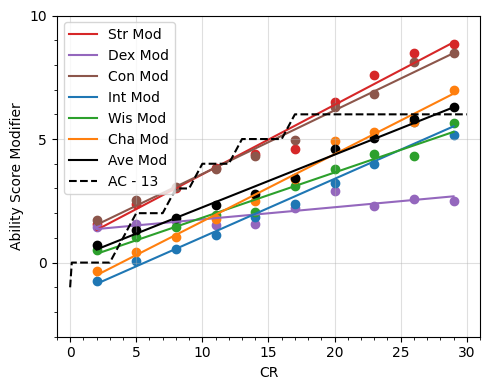

In [3]:
# Ability score modifier
columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['CR'].between(1, 30)]
df1.loc[:,'CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

column = 'Ave Mod'
coefs = np.polyfit(x, dfG[column], 1)
poly = np.poly1d(coefs)
ax.scatter(dfG.index.to_series(), dfG[column], color='black')
ax.plot(x, poly(x), '-', label=column, color='black')

column = 'AC - 13'
ax.plot(dfD['CR'], dfD['AC'] - 13, '--', label=column, color='black')

ax.set(xlim=[-1,31], ylim=[-3,10], xlabel='CR', ylabel='Ability Score Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

#if SAVEFIGS: plt.savefig('./monster-ability-score-modifier-trends.svg', metadata=METADATA)

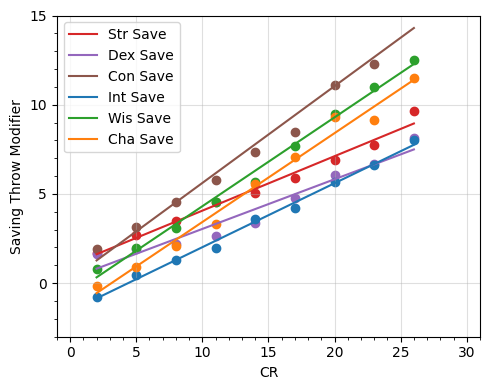

In [3]:
# Saving throw modifier
columns = ['Str Save','Dex Save','Con Save','Int Save','Wis Save','Cha Save']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,15], xlabel='CR', ylabel='Saving Throw Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

#if SAVEFIGS: plt.savefig('./monster-saving-throw-modifier-trends.svg', metadata=METADATA)

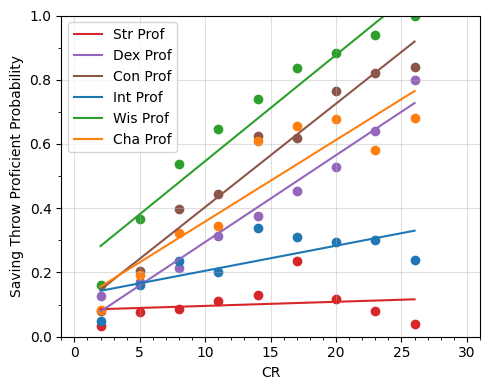

In [4]:
# Saving throw proficiency
columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()


x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[0,1], xlabel='CR', ylabel='Saving Throw Proficient Probability')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

#if SAVEFIGS: plt.savefig('./monster-saving-throw-proficiency-trends.svg', metadata=METADATA)

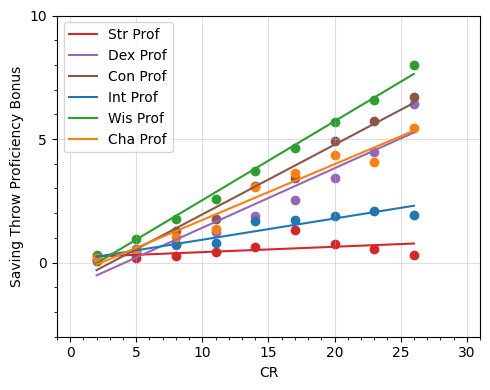

In [6]:
# Saving throw proficiency bonus
columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()


x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column]*dfG['PB'], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column]*dfG['PB'], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,10], xlabel='CR', ylabel='Saving Throw Proficiency Bonus')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

#if SAVEFIGS: plt.savefig('./monster-saving-throw-proficiency-bonus-trends.svg', metadata=METADATA)

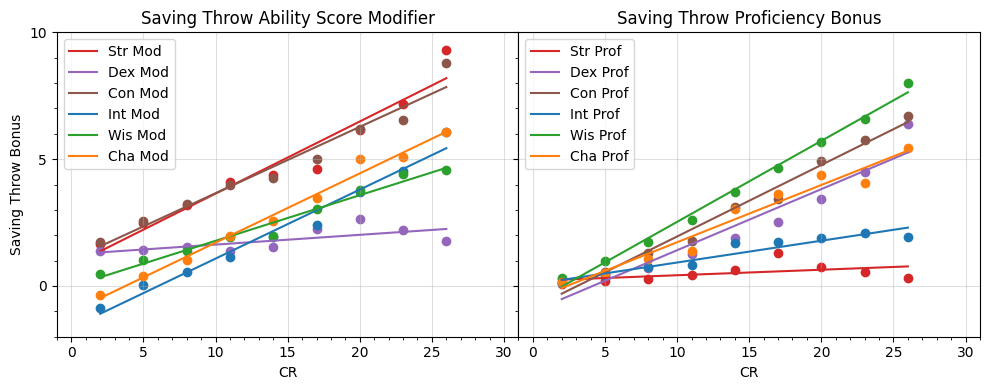

In [7]:
# Saving throw bonuses breakdown - horizontal
df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

rSub = 1; cSub = 2
fig = plt.figure(figsize=[FSIZE[0]*cSub,FSIZE[1]*rSub], dpi=FDPI, tight_layout=True)
gs = fig.add_gridspec(rSub, cSub, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
# trends
ax = axs[0]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(ylabel='Saving Throw Bonus', title='Saving Throw Ability Score Modifier')

columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
# trends
ax = axs[1]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column]*dfG['PB'], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column]*dfG['PB'], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(ylabel='Saving Throw Bonus', title='Saving Throw Proficiency Bonus')

for ax in axs:
    ax.set(xlim=[-1,31], ylim=[-2,10], xlabel='CR')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', axis='both', alpha=0.4)
    ax.label_outer()
    ax.legend()

#if SAVEFIGS: plt.savefig('./monster-saving-throw-bonuses-trends-horizontal.svg', metadata=METADATA)

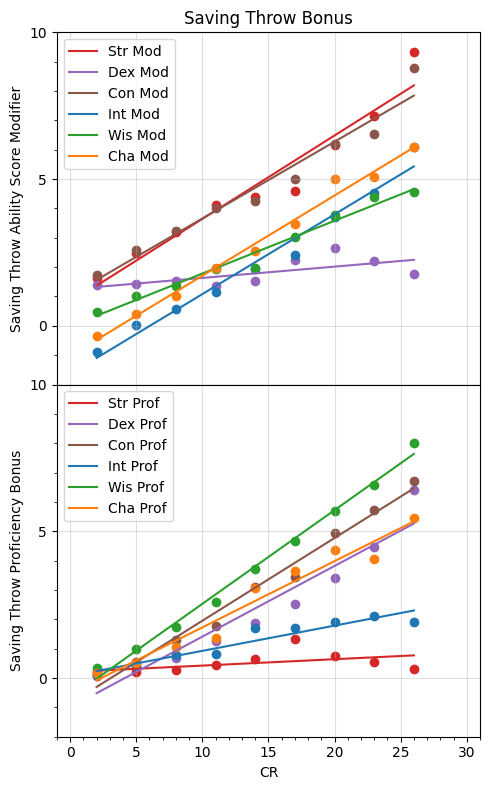

In [8]:
# Saving throw bonuses breakdown - vertical
df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

rSub = 2; cSub = 1
fig = plt.figure(figsize=[FSIZE[0]*cSub,FSIZE[1]*rSub], dpi=FDPI, tight_layout=True)
gs = fig.add_gridspec(rSub, cSub, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e']

columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod']
# trends
ax = axs[0]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(title='Saving Throw Bonus', ylabel='Saving Throw Ability Score Modifier')

columns = ['Str Prof','Dex Prof','Con Prof','Int Prof','Wis Prof','Cha Prof']
# trends
ax = axs[1]
x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column]*dfG['PB'], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column]*dfG['PB'], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(ylabel='Saving Throw Proficiency Bonus')

for ax in axs:
    ax.set(xlim=[-1,31], ylim=[-2,10], xlabel='CR')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', axis='both', alpha=0.4)
    ax.label_outer()
    ax.legend()

#if SAVEFIGS: plt.savefig('./monster-saving-throw-bonuses-trends-vertical.svg', metadata=METADATA)

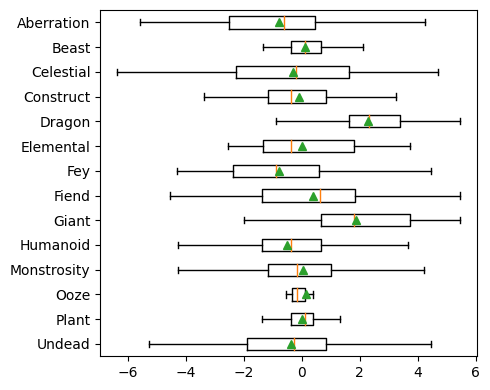

In [17]:
# Saving throw modifier by type

group = 'Type'
column = 'Con Save'

df1 = df0[df0['CR'].between(1, 30)]
#df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)

dfG = df1.groupby('CR').mean()
df1[column+' Delta'] =  df1.apply(lambda row: row[column] - dfG.loc[row['CR'], column], axis=1)

groups = df1[group].sort_values(ascending=False).unique()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()
bp = ax.boxplot(tuple(df1[df1[group].isin([g])][column+' Delta'] for g in groups), 
    labels=groups, showmeans=True, vert=False, showfliers=False, patch_artist=False)

[Text(0.5, 0, 'Con Save Delta')]

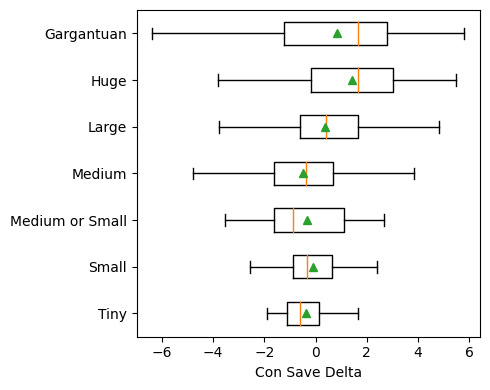

In [18]:
# Saving throw modifier by type
group = 'Size'
column = 'Con Save'

df1 = df0[df0['CR'].between(1, 30)]
#df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)

dfG = df1.groupby('CR').mean()
df1[column+' Delta'] =  df1.apply(lambda row: row[column] - dfG.loc[row['CR'], column], axis=1)

groups = df1[group].sort_values(ascending=False).unique()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()
bp = ax.boxplot(tuple(df1[df1[group].isin([g])][column+' Delta'] for g in groups), 
    labels=groups, showmeans=True, vert=False, showfliers=False, patch_artist=False)
ax.set(xlabel=column+' Delta')

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

yCol = 'Con'
xCols = ['CR','Size','Type']
aCols = [yCol] + xCols
df1 = df0[aCols]
X = pd.get_dummies(data=df1[xCols], drop_first=False)
Y = df1[yCol]

model = LinearRegression()
model.fit(X, Y)

coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# generate report
X_Sm = sm.add_constant(X)
ls = sm.OLS(Y, X_Sm).fit()
print(ls.summary())


                            OLS Regression Results                            
Dep. Variable:                    Con   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     219.8
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:32:15   Log-Likelihood:                -4221.7
No. Observations:                1920   AIC:                             8487.
Df Residuals:                    1898   BIC:                             8610.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6219 

In [20]:
# print the intercept
print(model.intercept_)
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

13.904780048754116


,Coefficient
CR,0.349077
Size_Gargantuan,3.260112
Size_Huge,2.383425
Size_Large,0.674584
Size_Medium,-0.777350
Size_Medium or Small,-0.868838
Size_Small,-1.325864
Size_Small or Medium,-1.069923
Size_Tiny,-2.276145
Type_Aberration,-0.371206


In [21]:
sns.regplot(Y, model.predict(X))

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [36]:
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
CR,0.335530
Size_gargantuan,3.443030
Size_huge,1.844385
Size_large,0.226880
Size_medium,-1.006390
Size_small,-1.877611
Size_tiny,-2.630295
Type_aberration,-0.591746
Type_beast,-1.464212
Type_celestial,0.779782


In [66]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

yCols = ['Str','Dex','Con','Int','Wis','Cha']
xCols = ['CR','Size','Type']

dfC = pd.DataFrame({'parameter': pd.get_dummies(data=df0[xCols], drop_first=False).columns})
dfC['Category'] = dfC['parameter'].str.extract(r'(?i)^([a-z]+)')
dfC['Group']    = dfC['parameter'].str.extract(r'(?i)([a-z]+)$')
model = LinearRegression()

for yCol in yCols:
    aCols = [yCol] + xCols
    df1 = df0[aCols]
    X = pd.get_dummies(data=df1[xCols], drop_first=False)
    Y = df1[yCol]

    model.fit(X, Y)
    X_Sm = sm.add_constant(X)
    ls = sm.OLS(Y, X_Sm).fit()
    print('{:}: R-squared {:.4f}'.format(yCol, ls.rsquared))
    dfC[yCol] = model.coef_

dfC1 = dfC[dfC['Category'].eq('Size')]
dfC1 = dfC1[['Group'] + yCols]
dfC1.rename(inplace=True, columns={'Group': 'Size'})
#dfC1.to_html('./ability-score-modifier-by-size-table.html', index=False, float_format='{:.2f}'.format)

dfC1 = dfC[dfC['Category'].eq('Type')]
dfC1 = dfC1[['Group'] + yCols]
dfC1.rename(inplace=True, columns={'Group': 'Type'})
#dfC1.to_html('./ability-score-modifier-by-type-table.html', index=False, float_format='{:.2f}'.format)

dfC


Str: R-squared 0.6962
Dex: R-squared 0.2388
Con: R-squared 0.7511
Int: R-squared 0.5973
Wis: R-squared 0.5098
Cha: R-squared 0.6383


,parameter,Category,Group,Str,Dex,Con,Int,Wis,Cha
0,CR,CR,CR,0.221359,0.211044,0.335530,0.624860,0.423492,0.620412
1,Size_gargantuan,Size,gargantuan,7.454979,-3.878039,3.443030,-4.841907,-2.234137,-3.763384
2,Size_huge,Size,huge,5.513188,-2.319997,1.844385,-1.455725,-0.405715,-0.739860
3,Size_large,Size,large,2.311297,-0.555137,0.226880,0.255062,0.219249,0.213376
4,Size_medium,Size,medium,-1.184877,0.739394,-1.006390,2.118677,0.904319,1.688216
5,Size_small,Size,small,-5.325880,1.730754,-1.877611,2.239620,0.174637,1.715319
6,Size_tiny,Size,tiny,-8.768707,4.283025,-2.630295,1.684274,1.341646,0.886333
7,Type_aberration,Type,aberration,-1.144502,0.078313,-0.591746,1.721547,0.404819,0.589617
8,Type_beast,Type,beast,-1.153106,0.785464,-1.464212,-4.086487,0.255827,-2.873522
9,Type_celestial,Type,celestial,2.682985,2.550160,0.779782,2.564832,4.617474,4.850590


In [67]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

yCols = ['Str Save','Dex Save','Con Save','Int Save','Wis Save','Cha Save']
xCols = ['CR','Size','Type']

dfC = pd.DataFrame({'parameter': pd.get_dummies(data=df0[xCols], drop_first=False).columns})
dfC['Category'] = dfC['parameter'].str.extract(r'(?i)^([a-z]+)')
dfC['Group']    = dfC['parameter'].str.extract(r'(?i)([a-z]+)$')
model = LinearRegression()

for yCol in yCols:
    aCols = [yCol] + xCols
    df1 = df0[aCols]
    X = pd.get_dummies(data=df1[xCols], drop_first=False)
    Y = df1[yCol]

    model.fit(X, Y)
    X_Sm = sm.add_constant(X)
    ls = sm.OLS(Y, X_Sm).fit()
    print('{:}: R-squared {:.4f}'.format(yCol, ls.rsquared))
    dfC[yCol] = model.coef_

dfC1 = dfC[dfC['Category'].eq('Size')]
dfC1 = dfC1[['Group'] + yCols]
dfC1.rename(inplace=True, columns={'Group': 'Size'})
#dfC1.to_html('./save-modifier-by-size-table.html', index=False, float_format='{:.2f}'.format)

dfC1 = dfC[dfC['Category'].eq('Type')]
dfC1 = dfC1[['Group'] + yCols]
dfC1.rename(inplace=True, columns={'Group': 'Type'})
#dfC1.to_html('./save-modifier-by-type-table.html', index=False, float_format='{:.2f}'.format)

dfC


Str Save: R-squared 0.6338
Dex Save: R-squared 0.4260
Con Save: R-squared 0.8045
Int Save: R-squared 0.5690
Wis Save: R-squared 0.7259
Cha Save: R-squared 0.6773


,parameter,Category,Group,Str Save,Dex Save,Con Save,Int Save,Wis Save,Cha Save
0,CR,CR,CR,0.150834,0.257573,0.380863,0.483578,0.498673,0.499317
1,Size_gargantuan,Size,gargantuan,3.810413,-1.894569,1.803948,-3.484232,-1.298764,-2.006359
2,Size_huge,Size,huge,2.875114,-1.411854,0.987455,-1.450346,-0.510052,-0.695972
3,Size_large,Size,large,1.055993,-0.387241,-0.079390,0.235085,-0.050739,-0.112616
4,Size_medium,Size,medium,-0.616214,0.222282,-0.769010,1.443556,0.512290,0.896794
5,Size_small,Size,small,-2.752094,1.270410,-0.731347,1.674795,0.300999,1.190594
6,Size_tiny,Size,tiny,-4.373212,2.200972,-1.211655,1.581142,1.046266,0.727560
7,Type_aberration,Type,aberration,-0.868512,-0.528034,-0.911180,1.615273,0.445087,0.518405
8,Type_beast,Type,beast,-0.668438,0.399368,-0.752481,-1.598879,0.209428,-1.624843
9,Type_celestial,Type,celestial,1.979190,0.851003,-0.209179,1.060849,2.627486,4.108995
